In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("UniversalBank.csv")

In [16]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(5000, 14)
   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data col

In [17]:
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64


In [18]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [19]:
for col in df.select_dtypes(include="object"):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [20]:
df.drop(["ID", "ZIP.Code"], axis=1, inplace=True)

In [21]:
print(df.select_dtypes(include="object").columns)

Index([], dtype='object')


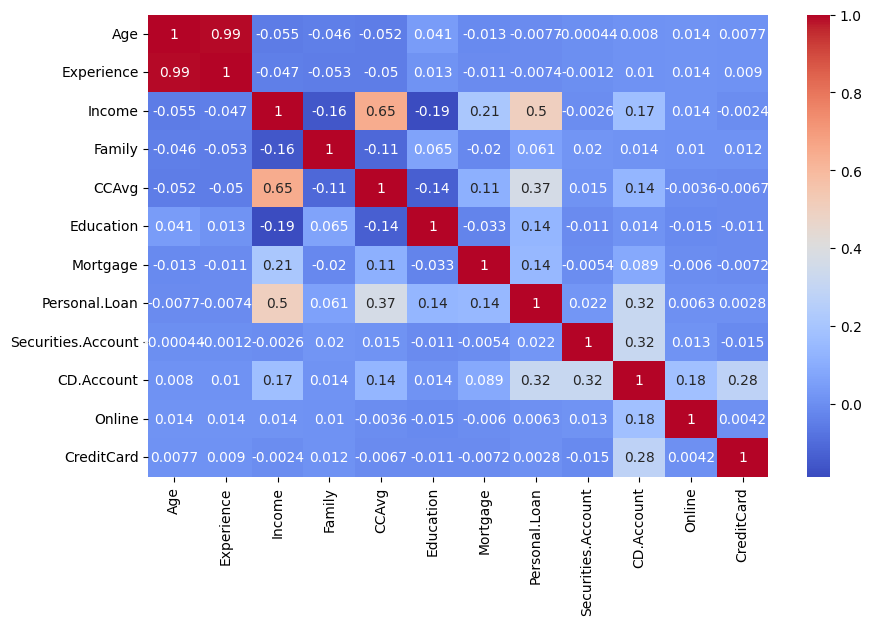

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [23]:
df.drop("Experience", axis=1, inplace=True)

In [24]:
X = df.drop("Personal.Loan", axis=1)
y = df["Personal.Loan"]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
print(X_scaled.shape)

(5000, 10)


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

In [29]:
svc_model = SVC(kernel="rbf")

In [30]:
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [31]:
y_pred = svc_model.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[893   2]
 [ 20  85]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.98      0.81      0.89       105

    accuracy                           0.98      1000
   macro avg       0.98      0.90      0.94      1000
weighted avg       0.98      0.98      0.98      1000

